<a href="https://colab.research.google.com/github/jing-pw/YCBS258-Assignments/blob/master/C6_Autoencoder_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Autoencoder
### Directives
* Create the autoencoders described below, you can play with the topology, those are just starting points
* Use GPU runtime
* Print 10 inputs and their associated outputs
* Don't forget to normalize your data
* Use the Functional API for Keras
* Plot the model loss over time

### Autoencoders to build
1. Stacked
2. Convolutional Encoder

#### Don't worry if the data you generate looks bad. This is just an exercise, we can't really measure performance on an unsupervised task

In [1]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = fashion_mnist.load_data()
all_data = np.concatenate((X_train, X_test))
all_data.shape

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


(70000, 28, 28)

In [0]:
def print_first_9(data):
  fig = plt.figure()
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i], interpolation='none')
    plt.title("Digit: {}".format(i))
    plt.xticks([])
    plt.yticks([])

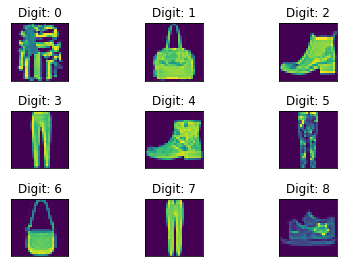

In [3]:
print_first_9(all_data[-9:])

In [0]:
X = all_data.reshape(-1, 28, 28, 1).astype(np.float32)

In [5]:
np.max(X)

255.0

In [6]:
#scale the pixels

X /= 255
np.max(X)

1.0

In [0]:
#don't need the label for this exercise
#split the data to train and validation

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, X, test_size=0.2, random_state=42)

In [0]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
import keras.backend as K

In [9]:
K.clear_session()

batch_size = 128
epochs = 50
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))

W0717 02:20:10.587095 139907739899776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 02:20:10.589447 139907739899776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 02:20:10.614673 139907739899776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 02:20:10.616250 139907739899776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [0]:
def autoencoder(input_img):
  #encoder
  #input = 28 x 28 x 1 (wide and thin)
  conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
  conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
  conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

  #decoder
  conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
  up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
  conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
  up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
  return decoded

In [11]:
myencoder = Model(input_img, autoencoder(input_img))
myencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

W0717 02:20:10.651336 139907739899776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 02:20:10.677682 139907739899776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0717 02:20:10.738404 139907739899776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0717 02:20:10.792357 139907739899776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [12]:
myencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
__________

In [0]:
#from keras.callbacks import EarlyStopping
#earlystop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [14]:
hist = myencoder.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid))
                     #, 
                    #callbacks=[earlystop])

Train on 56000 samples, validate on 14000 samples
Epoch 1/50
56000/56000 [==============================] - 15s 276us/step - loss: 0.0216 - val_loss: 0.0107
Epoch 2/50
56000/56000 [==============================] - 14s 243us/step - loss: 0.0088 - val_loss: 0.0072
Epoch 3/50
56000/56000 [==============================] - 14s 243us/step - loss: 0.0064 - val_loss: 0.0061
Epoch 4/50
56000/56000 [==============================] - 14s 244us/step - loss: 0.0053 - val_loss: 0.0055
Epoch 5/50
56000/56000 [==============================] - 14s 243us/step - loss: 0.0046 - val_loss: 0.0041
Epoch 6/50
56000/56000 [==============================] - 14s 243us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 7/50
56000/56000 [==============================] - 14s 244us/step - loss: 0.0039 - val_loss: 0.0034
Epoch 8/50
56000/56000 [==============================] - 14s 244us/step - loss: 0.0036 - val_loss: 0.0035
Epoch 9/50
56000/56000 [==============================] - 14s 244us/step - loss: 0.0034 - val_

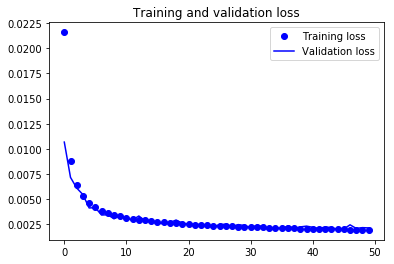

In [15]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();

In [16]:
X_test.shape

(10000, 28, 28)

In [0]:
X_pred = X_test.reshape(-1, 28, 28, 1).astype(np.float32)

In [18]:
X_pred.shape

(10000, 28, 28, 1)

In [19]:
np.max(X_pred)

255.0

In [0]:
y_pred = myencoder.predict(X_pred/255)

In [21]:
X_pred = X_pred.reshape(-1, 28, 28)
X_pred.shape

(10000, 28, 28)

In [23]:
y_pred = y_pred.reshape(-1,28,28)
y_pred.shape

(10000, 28, 28)

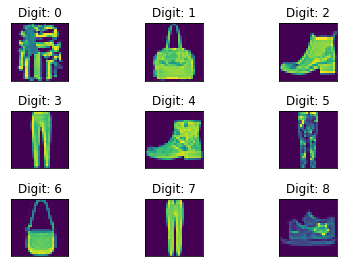

In [24]:
print_first_9(X_pred[-9:])

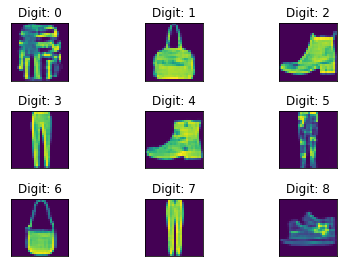

In [25]:
print_first_9(y_pred[-9:])

In [0]:
#construct a stacked autoencoder
from keras.layers import Dense
from keras.optimizers import Adam

In [0]:
# Stacked 784 - 392 - 196 - 98 - 196 - 392 - 784
K.clear_session()

stacked_in = Input(shape=(784,))
stacked = Dense(784, activation='relu')(stacked_in)
stacked = Dense(392, activation='relu')(stacked)
stacked = Dense(196, activation='relu')(stacked)
stacked = Dense(98, activation='relu')(stacked)
stacked = Dense(196, activation='relu')(stacked)
stacked = Dense(392, activation='relu')(stacked)
stacked_out = Dense(784, activation='relu')(stacked)

stacked_model = Model(stacked_in, stacked_out)
stacked_model.compile(optimizer='adam', loss='mse')

In [28]:
stacked_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_3 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_4 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_5 (Dense)              (None, 196)               19404     
_________________________________________________________________
dense_6 (Dense)              (None, 392)               77224     
__________

In [0]:
X1 = all_data.reshape(-1, 784).astype(np.float32)
X1 /= 255
X1_train, X1_valid, y1_train, y1_valid = train_test_split(
    X1, X1, test_size=0.2, random_state=42)

In [30]:
hist_s = stacked_model.fit(X1_train, y1_train, 
                           epochs=50, batch_size=batch_size,
                           verbose=1, 
                           validation_data=(X1_valid, y1_valid))

Train on 56000 samples, validate on 14000 samples
Epoch 1/50
56000/56000 [==============================] - 6s 103us/step - loss: 0.0423 - val_loss: 0.0266
Epoch 2/50
56000/56000 [==============================] - 5s 91us/step - loss: 0.0242 - val_loss: 0.0216
Epoch 3/50
56000/56000 [==============================] - 5s 90us/step - loss: 0.0212 - val_loss: 0.0205
Epoch 4/50
56000/56000 [==============================] - 5s 91us/step - loss: 0.0202 - val_loss: 0.0196
Epoch 5/50
56000/56000 [==============================] - 5s 90us/step - loss: 0.0194 - val_loss: 0.0189
Epoch 6/50
56000/56000 [==============================] - 5s 90us/step - loss: 0.0188 - val_loss: 0.0186
Epoch 7/50
56000/56000 [==============================] - 5s 91us/step - loss: 0.0185 - val_loss: 0.0184
Epoch 8/50
56000/56000 [==============================] - 5s 91us/step - loss: 0.0177 - val_loss: 0.0169
Epoch 9/50
56000/56000 [==============================] - 5s 90us/step - loss: 0.0170 - val_loss: 0.0168
Epoc

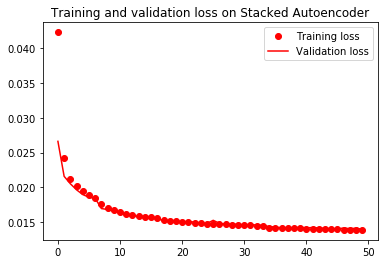

In [31]:
loss = hist_s.history['loss']
val_loss = hist_s.history['val_loss']

plt.figure()
plt.plot(loss, 'ro', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss on Stacked Autoencoder')
plt.legend()
plt.show();

In [0]:
X1_pred = X_test.reshape(-1, 784).astype(np.float32)

In [0]:
y1_pred = stacked_model.predict(X1_pred/255)

In [0]:
X1_pred = X1_pred.reshape(-1, 28, 28)
y1_pred = y1_pred.reshape(-1, 28, 28)

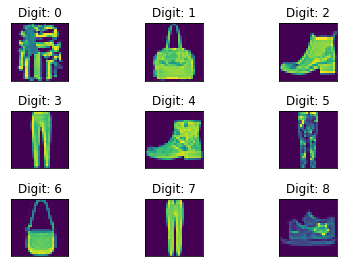

In [35]:
print_first_9(X1_pred[-9:])

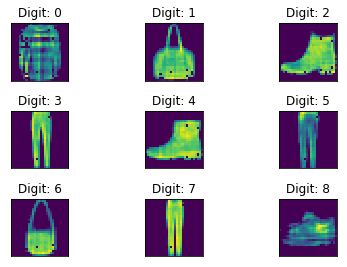

In [36]:
print_first_9(y1_pred[-9:])

###Conclusion
From above network construction, stacked model trained more parameters than convolutional autoencoder model, yet the reconstruction of the input image are not as good. Also it shows overfitting oberviously at one point.